In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator


In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'RESEARCH DATASET',
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,
    class_mode='categorical'
)


Found 9100 images belonging to 2 classes.


In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: class_1 and class_2
])


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
r=model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator), verbose=1)

Epoch 1/10
285/285 [==============================] - 591s 2s/step - loss: 0.5839 - accuracy: 0.6830
Epoch 2/10
285/285 [==============================] - 633s 2s/step - loss: 0.3482 - accuracy: 0.8388
Epoch 3/10
285/285 [==============================] - 522s 2s/step - loss: 0.2565 - accuracy: 0.8878
Epoch 4/10
285/285 [==============================] - 472s 2s/step - loss: 0.1912 - accuracy: 0.9275
Epoch 5/10
285/285 [==============================] - 480s 2s/step - loss: 0.1267 - accuracy: 0.9530
Epoch 6/10
285/285 [==============================] - 488s 2s/step - loss: 0.1032 - accuracy: 0.9622
Epoch 7/10
285/285 [==============================] - 492s 2s/step - loss: 0.0954 - accuracy: 0.9667
Epoch 8/10
285/285 [==============================] - 490s 2s/step - loss: 0.0745 - accuracy: 0.9729
Epoch 9/10
285/285 [==============================] - 664s 2s/step - loss: 0.0714 - accuracy: 0.9740
Epoch 10/10
285/285 [==============================] - 643s 2s/step - loss: 0.0663 - accura

In [6]:
model.save('cnn1.h5')

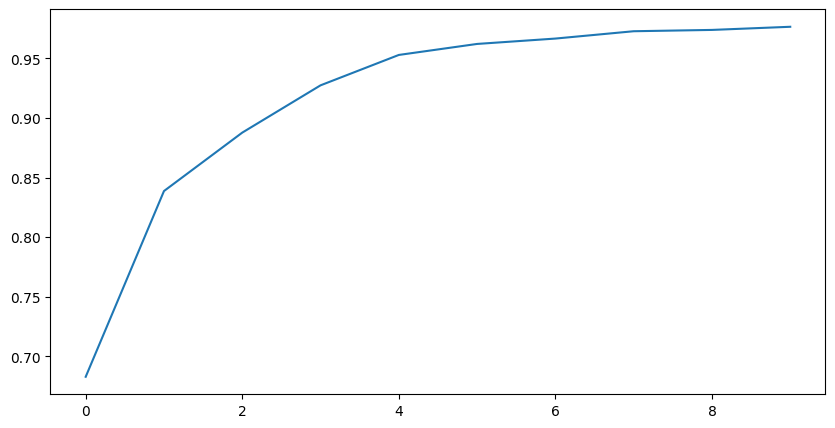

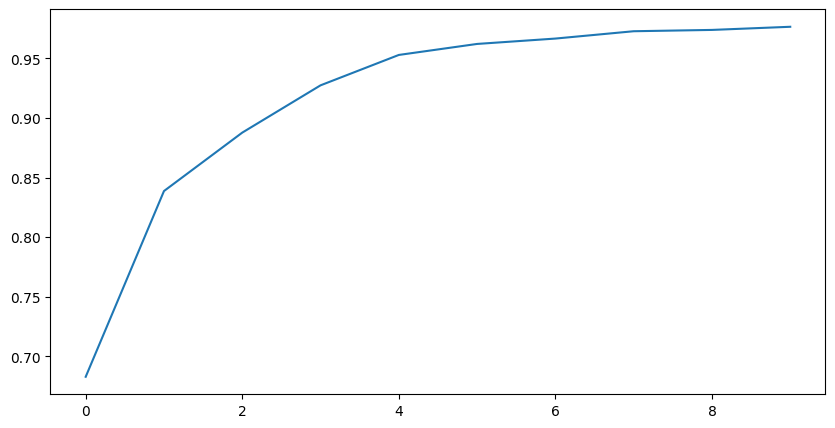

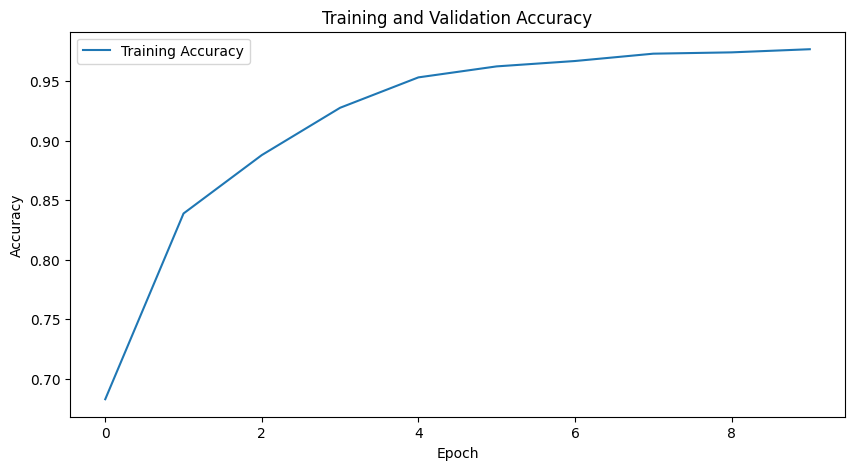

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
plt.figure(figsize=(10, 5))
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

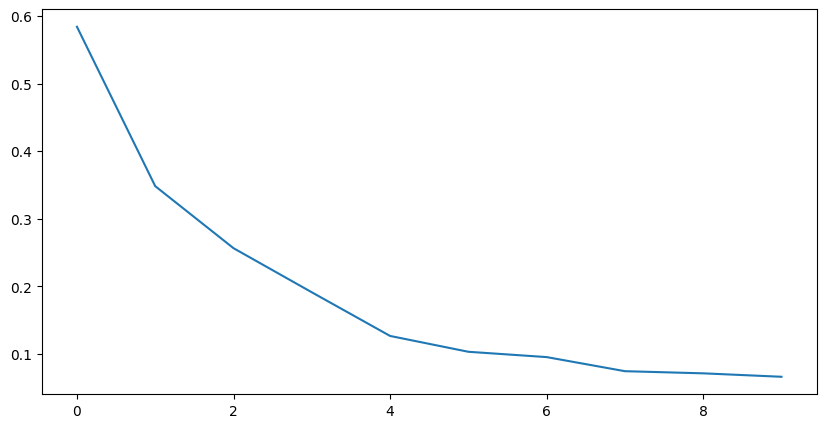

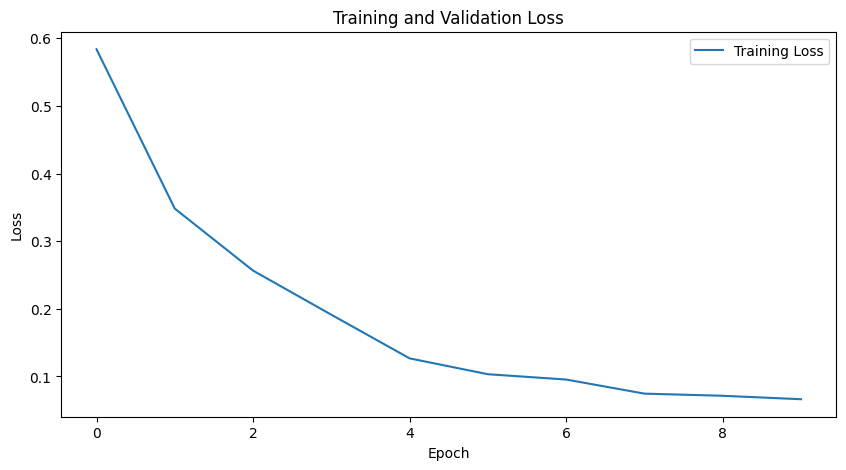

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(r.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
